Импортируем необходимые библиотеки

In [109]:
import numpy as np
import matplotlib.pyplot as plt

Определяем параметры для варианта №30

In [110]:
a = -4.45
b = -3.12
c = 9.36
d = -1.88

Определяем функцию для решения ОДУ

In [111]:
def ODE(x):
    theta = x[0]
    theta_dot = x[1]

    theta_ddot = (d - b*theta_dot - c*theta) / a

    return np.array([theta_dot, theta_ddot])

Определяем константы для аналитического решения

In [112]:
C1 = 0.131
C2 = 0.081
xp = -0.20085
r1 = 1.1415
r2 = -1.8426

Определяем функцию для аналитического решения 

In [113]:
def x_analytical(t):
    return C1 * np.exp(r1 * t) + C2 * np.exp(r2 * t) + xp

Определяем функции для решения численных методов

In [114]:
def forward_euler(fun, x0, Tf, h):
    """
    Explicit Euler integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    
    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """
    Implicit Euler integration method using fixed-point iteration
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess
        
        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            
            if error < tol:
                break
    
    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """
    4th order Runge-Kutta integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    
    return x_hist, t


Расчет численных методов

In [115]:
x0 = np.array([0.01, 0.0])  # Начальные условия: [положение, скорость]
Tf = 10.0
h = 0.01

# Forward Euler
x_fe, t_fe = forward_euler(ODE, x0, Tf, h)

# Backward Euler  
x_be, t_be = backward_euler(ODE, x0, Tf, h)

# Runge-Kutta 4
x_rk4, t_rk4 = runge_kutta4(ODE, x0, Tf, h)

Расчет аналитического решения

In [116]:
t = t_fe
x_a = x_analytical(t)

Выводим сравнительные графики методов

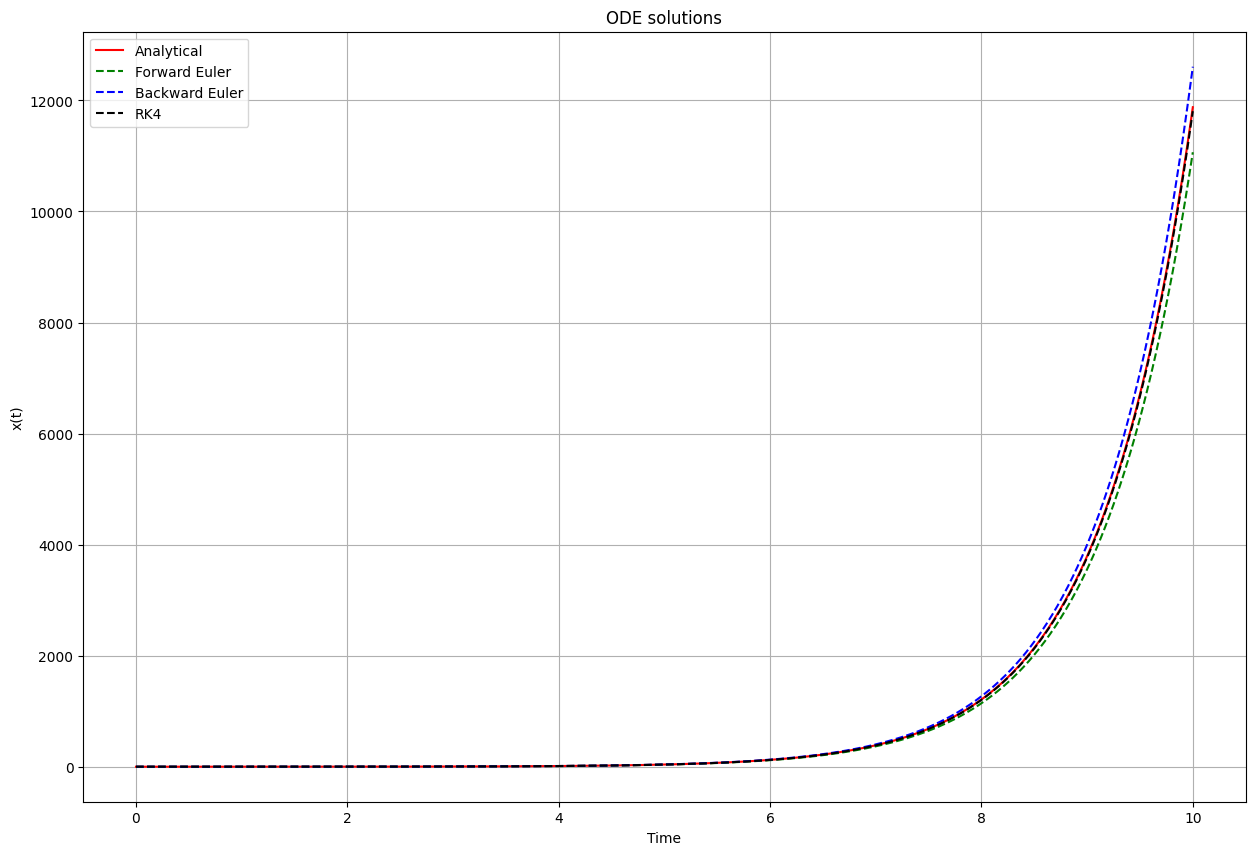

In [119]:
# Plot results
plt.figure(figsize=(15, 10))
plt.title('ODE solutions')
plt.plot(t, x_a, 'r-', label='Analytical')
plt.plot(t_fe, x_fe[0], 'g--', label='Forward Euler')
plt.plot(t_be, x_be[0], 'b--', label='Backward Euler')
plt.plot(t_rk4, x_rk4[0], 'k--', label='RK4')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.show()